In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [24]:
df = pd.read_csv("/content/covid_19_clean_complete (3).csv", parse_dates = ['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [25]:
# Renaming columns for easy usage
df.rename(columns = {'Date': 'date',
                      'Province/State': 'state',
                      'Country/Region': 'country',
                      'Lat' : 'lat', 'Long': 'long',
                      'Confirmed' : 'confirmed',
                      'Deaths' : 'deaths',
                      'Recovered' : 'recovered'},
            inplace = True)

In [26]:
# Active Cases
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [27]:
# combining the latest data for the countries 
top = df[df['date'] == df['date'].max()]
world = top.groupby('country')['confirmed', 'active', 'deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [28]:
figure = px.choropleth(world, locations = 'country',
                        locationmode = 'country names', color = 'active',
                        hover_name = 'country', range_color = [1,1000],
                        color_continuous_scale = "greens",
                        title = "Countries with Active Cases")

figure.show()

In [29]:
# Determine the Total Confimed Cases grouped by Date
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases.head()

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Cases')]

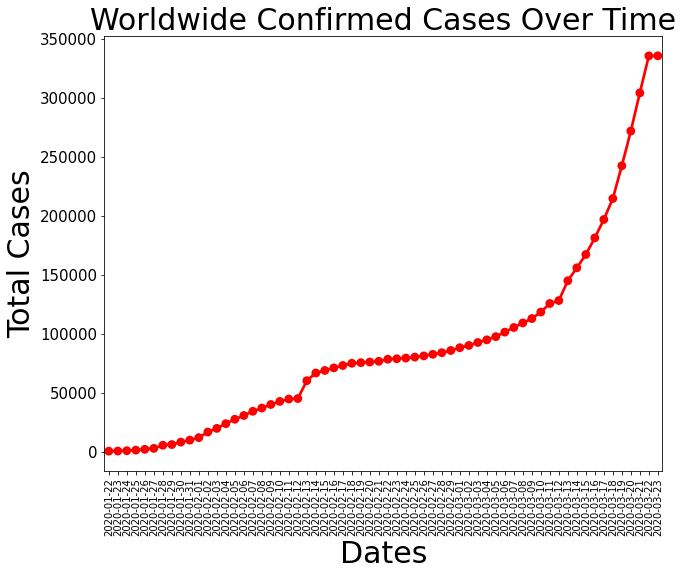

In [30]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 90, fontsize= 10)
plt.yticks (fontsize = 15)
plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total Cases", fontsize = 30)
plt.title("Worldwide Confirmed Cases Over Time", fontsize = 30)

ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = 'r')
ax.set(xlabel = 'Dates', ylabel = 'Total Cases')

In [31]:
# Current Top Countries having most Active Cases
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

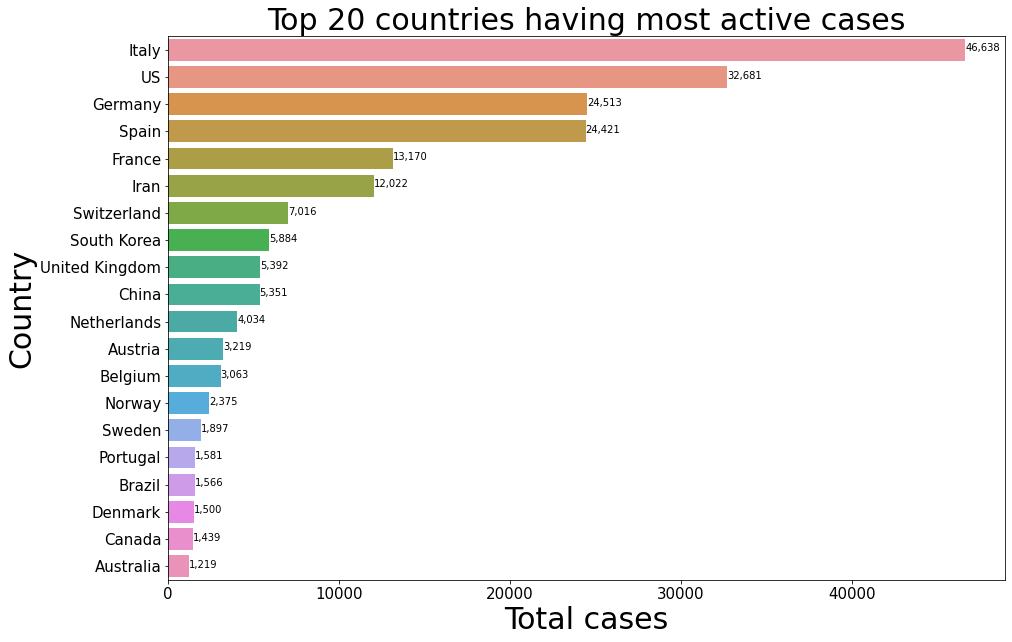

In [32]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize= 15)
plt.yticks (fontsize = 15)
plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel("Country", fontsize = 30)
plt.title("Top 20 countries having most active cases", fontsize = 30)

ax = sns.barplot(x = top_actives.active, y = top_actives.country)

for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha ='left', va = 'center') 
    
ax.set(xlabel = 'Total cases', ylabel = 'Country')

In [33]:
# Data of China
china = df[df.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,28.0,17.0,548.0,503.0
1,2020-01-23,30.0,18.0,643.0,595.0
2,2020-01-24,36.0,26.0,920.0,858.0
3,2020-01-25,39.0,42.0,1406.0,1325.0
4,2020-01-26,49.0,56.0,2075.0,1970.0


In [34]:
# Data of USA
us = df[df.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us.head()

,date,recovered,deaths,confirmed,active
0,2020-02-24,0.0,0.0,36.0,36.0
1,2020-02-25,0.0,0.0,36.0,36.0
2,2020-02-26,0.0,0.0,42.0,42.0
3,2020-02-27,0.0,0.0,42.0,42.0
4,2020-02-28,0.0,0.0,44.0,44.0


In [35]:
# Data of Italy
italy = df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0.0,0.0,2.0,2.0
1,2020-02-01,0.0,0.0,2.0,2.0
2,2020-02-02,0.0,0.0,2.0,2.0
3,2020-02-03,0.0,0.0,2.0,2.0
4,2020-02-04,0.0,0.0,2.0,2.0


In [36]:
#Data of India
india = df[df.country == 'India']
india = india.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india.head()

,date,recovered,deaths,confirmed,active
0,2020-01-30,0.0,0.0,1.0,1.0
1,2020-01-31,0.0,0.0,1.0,1.0
2,2020-02-01,0.0,0.0,1.0,1.0
3,2020-02-02,0.0,0.0,2.0,2.0
4,2020-02-03,0.0,0.0,3.0,3.0


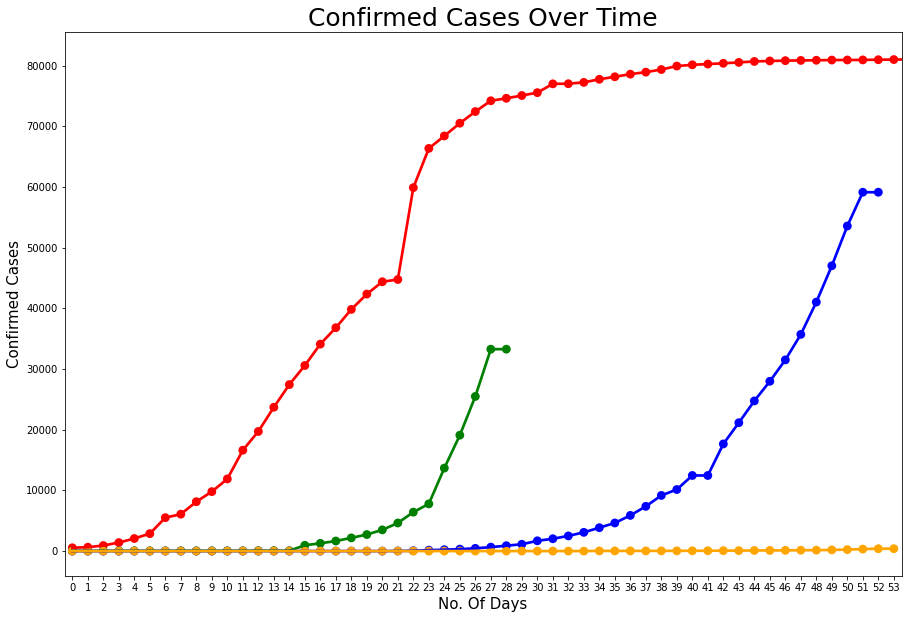

In [37]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.confirmed, color='red')
sns.pointplot(us.index, us.confirmed, color='green')
sns.pointplot(italy.index, italy.confirmed, color='blue')
sns.pointplot(india.index, india.confirmed, color='orange')
plt.title('Confirmed Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Confirmed Cases', fontsize = 15)
plt.show()

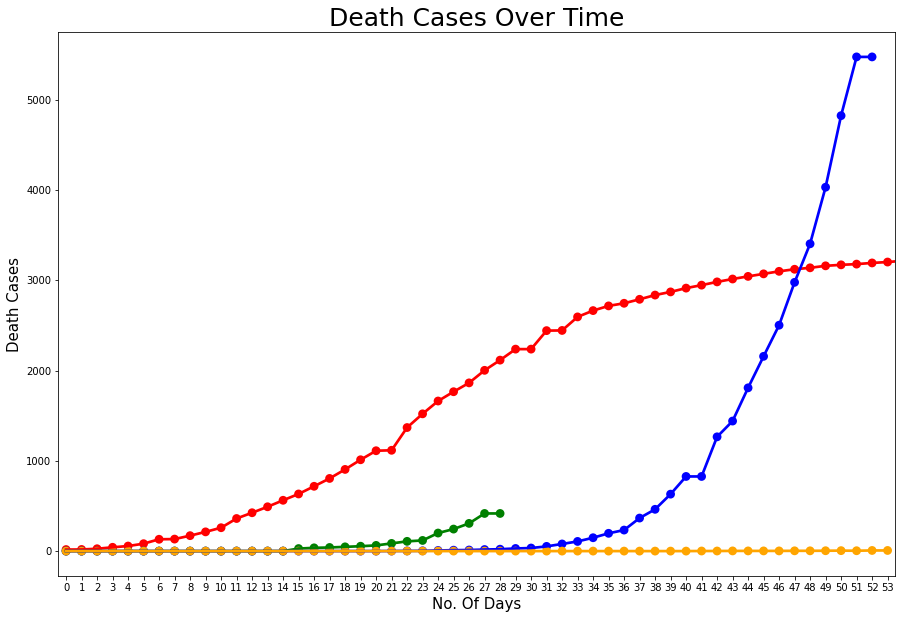

In [38]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.deaths, color='red')
sns.pointplot(us.index, us.deaths, color='green')
sns.pointplot(italy.index, italy.deaths, color='blue')
sns.pointplot(india.index, india.deaths, color='orange')
plt.title('Death Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Death Cases', fontsize = 15)
plt.show()

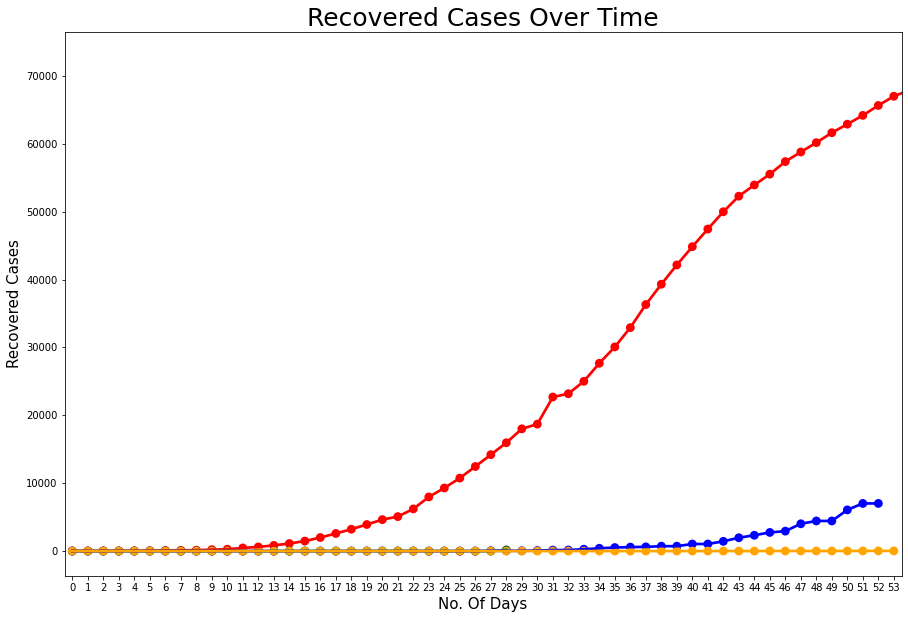

In [39]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.recovered, color='red')
sns.pointplot(us.index, us.recovered, color='green')
sns.pointplot(italy.index, italy.recovered, color='blue')
sns.pointplot(india.index, india.recovered, color='orange')
plt.title('Recovered Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Recovered Cases', fontsize = 15)
plt.show()

# Detailed Analysis of COVID Cases in India

In [43]:
df_india = pd.read_excel('covid_19_india.xlsx')
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [44]:
df_india['Total Cases'] = df_india['Total Confirmed cases (Indian National)'] + df_india['Total Confirmed cases ( Foreign National )']

In [ ]:
df_india['Total Active'] = df_india['Total Cases'] - (df_india['Death'] + df_india['Cured'])
total_active = df_india['Total Active'].sum()
print('Total Number of Active COVID 19 cases across India', total_active)
Tot_Cases = df_india.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient(cmap='hot_r')

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

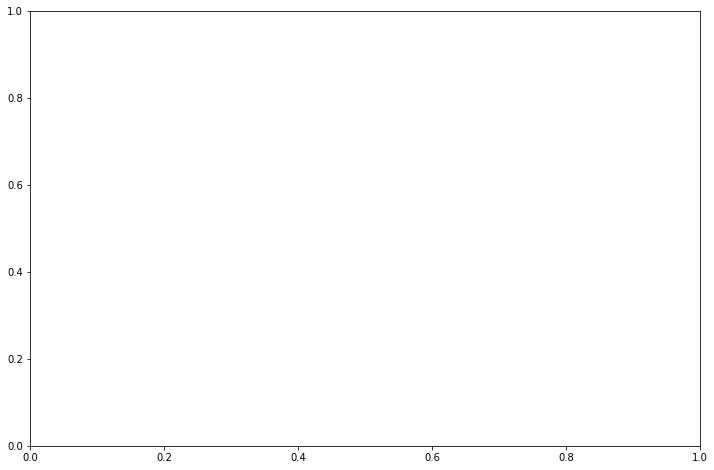

In [46]:
plt.subplots(figsize=(12,8))

[Text(0, 0.5, 'States and UT'), Text(0.5, 0, 'Cases')]

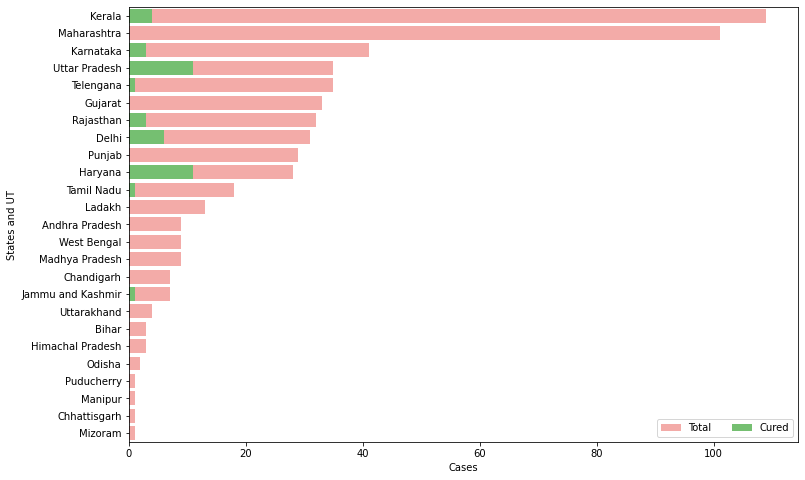

In [47]:
f,ax= plt.subplots(figsize=(12,8))
data = df_india[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases', ascending=False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total", color ="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color ="g")

ax.legend(ncol=2, loc="lower right", frameon = True)
ax.set(ylabel="States and UT", xlabel="Cases")


In [48]:
dbd_india = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')

FileNotFoundError: ignored

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'], y=dbd_india['Total Cases'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus cases in India (Cumulative Cases)', plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_india, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus cases in India on daily basis', plot_bgcolor='rgb(230, 230, 230)')
fig.show()

NameError: ignored

# Insights into COVID cases globally

In [51]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns = {'Country/Region':'Country'}, inplace=True)

FileNotFoundError: ignored

In [52]:
df_confirmed.head()

NameError: ignored

In [ ]:
df_recovered.head()

In [ ]:
df_deaths.head()

In [ ]:
df.head()

In [ ]:
df2 = df.groupby(['date', 'country', 'state'])[['date', 'state', 'country', 'confirmed', 'deaths', 'recovered']]
df2.head()

In [ ]:
df_india_cases = df.query('country == "India"').groupby("date")[['confirmed', 'deaths', 'recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india_cases[['date', 'confirmed']], df_india_cases[['date', 'deaths']], df_india_cases[['date', 'recovered']]

In [ ]:
df.groupby('date').sum().head()

In [ ]:
confirmed = df.groupby('date').sum()['confirmed'].reset_index()
deaths = df.groupby('date').sum()['deaths'].reset_index()
recovered = df.groupby('date').sum()['recovered'].reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['confirmed'], mode='lines+markers', name='confirmed', line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['deaths'], mode='lines+markers', name='deaths', line = dict(color = 'red')))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['recovered'], mode='lines+markers', name='recovered', line = dict(color = 'green')))
fig.update_layout(title_text='World wide COVID-19 Cases', xaxis_tickfont_size = 14, yaxis=dict(title='Number of Cases'), plot_bgcolor='rgb(230, 230, 230)')
fig.show()


# TimeSeries Analysis of COVID cases globally and India in Particular

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
# to install in jupyter
# !pip install pystan fbprophet
# from fbprophet import Prophet

In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
deaths_forecast_plot = m.plot(forecast)

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
recovered_forecast_plot = m.plot(forecast)

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)

In [ ]:
india_confirmed.columns = ['ds', 'y']
india_confirmed['ds']= pd.to_datetime(india_confirmed['ds'])

In [ ]:
m = Prophet()
m.fit(india_confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
india_confirmed_plot = m.plot(forecast)

In [ ]:
india_confirmed_plot = m.plot_components(forecast)

In [ ]:
india_deaths.columns = ['ds', 'y']
india_deaths['ds']= pd.to_datetime(india_deaths['ds'])

In [ ]:
m = Prophet()
m.fit(india_deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
india_deaths_plot = m.plot(forecast)

In [ ]:
india_deaths_plot = m.plot_components(forecast)

In [ ]:
india_recovered.columns = ['ds', 'y']
india_recovered['ds']= pd.to_datetime(india_recovered['ds'])

In [ ]:
m = Prophet()
m.fit(india_recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
india_recovered_plot = m.plot(forecast)

In [ ]:
india_recovered_plot = m.plot_components(forecast)